# Project Luther
## What Makes a Comparable Company?
### Hasan Haq

In [47]:
import data
import matplotlib.pyplot as plt
import good_morning as gm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from tqdm import tqdm
%matplotlib inline

## **S&P 500 Stock Tickers**

In [2]:
ticks = ['A', 'AA', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACE', 'ACN', 'ADBE',
         'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'ADT', 'AEE', 'AEP', 'AES', 'AET',
         'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AKAM', 'ALL', 'ALLE', 'ALTR', 'ALXN',
         'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON',
         'APA', 'APC', 'APD', 'APH', 'ARG', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AXP',
         'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN',
         'BF.B', 'BHI', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRCM', 'BRK.B', 'BSX',
         'BWA', 'BXLT', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAM', 'CAT', 'CB', 'CBG',
         'CBS', 'CCE', 'CCI', 'CCL', 'CELG', 'CERN', 'CF', 'CHK', 'CHRW', 'CI',
         'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CMCSK', 'CME', 'CMG', 'CMI', 'CMS',
         'CNP', 'CNX', 'COF', 'COG', 'COH', 'COL', 'COP', 'COST', 'CPB', 'CPGX',
         'CRM', 'CSC', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVC', 'CVS',
         'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
         'DISCA', 'DISCK', 'DLPH', 'DLTR', 'DNB', 'DO', 'DOV', 'DOW', 'DPS', 'DRI',
         'DTE', 'DUK', 'DVA', 'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL',
         'EMC', 'EMN', 'EMR', 'ENDP', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ESRX',
         'ESS', 'ESV', 'ETFC', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'F',
         'FAST', 'FB', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLIR',
         'FLR', 'FLS', 'FMC', 'FOSL', 'FOX', 'FOXA', 'FSLR', 'FTI', 'FTR', 'GAS',
         'GD', 'GE', 'GGP', 'GILD', 'GIS', 'GLW', 'GM', 'GMCR', 'GME', 'GNW', 'GOOG',
         'GOOGL', 'GPC', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAR', 'HAS',
         'HBAN', 'HBI', 'HCA', 'HCBK', 'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HOG',
         'HON', 'HOT', 'HP', 'HPQ', 'HRB', 'HRL', 'HRS', 'HSIC', 'HST', 'HSY', 'HUM',
         'IBM', 'ICE', 'IFF', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG',
         'ITW', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY',
         'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KORS', 'KR', 'KSS', 'KSU',
         'L', 'LB', 'LEG', 'LEN', 'LH', 'LLL', 'LLTC', 'LLY', 'LM', 'LMT', 'LNC',
         'LOW', 'LRCX', 'LUK', 'LUV', 'LVLT', 'LYB', 'M', 'MA', 'MAC', 'MAR', 'MAS',
         'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MHFI', 'MHK',
         'MJN', 'MKC', 'MLM', 'MMC', 'MMM', 'MNK', 'MNST', 'MO', 'MON', 'MOS', 'MPC',
         'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MU', 'MUR', 'MYL', 'NAVI', 'NBL',
         'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN', 'NOC', 'NOV',
         'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O',
         'OI', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PBI', 'PCAR',
         'PCG', 'PCL', 'PCLN', 'PCP', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG',
         'PGR', 'PH', 'PHM', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POM', 'PPG',
         'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PX', 'PXD', 'PYPL',
         'QCOM', 'QRVO', 'R', 'RAI', 'RCL', 'REGN', 'RF', 'RHI', 'RHT', 'RIG', 'RL',
         'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'RTN', 'SBUX', 'SCG', 'SCHW', 'SE',
         'SEE', 'SHW', 'SIAL', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNDK', 'SNI',
         'SO', 'SPG', 'SPLS', 'SRCL', 'SRE', 'STI', 'STJ', 'STT', 'STX', 'STZ',
         'SWK', 'SWKS', 'SWN', 'SYK', 'SYMC', 'SYY', 'T', 'TAP', 'TDC', 'TE', 'TEL',
         'TGNA', 'TGT', 'THC', 'TIF', 'TJX', 'TMK', 'TMO', 'TRIP', 'TROW', 'TRV',
         'TSCO', 'TSN', 'TSO', 'TSS', 'TWC', 'TWX', 'TXN', 'TXT', 'TYC', 'UA', 'UAL',
         'UHS', 'UNH', 'UNM', 'UNP', 'UPS', 'URBN', 'URI', 'USB', 'UTX', 'V', 'VAR',
         'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ',
         'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WFM', 'WHR', 'WM', 'WMB', 'WMT', 'WRK',
         'WU', 'WY', 'WYN', 'WYNN', 'XEC', 'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX',
         'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']

# **View an example Morningstar data frame**

In [3]:
kr = gm.KeyRatiosDownloader()
ms = kr.download('AAL')

share = data.Share('AAL')

0.0

# **Iterate through and populate data for each ticker**

In [40]:
sic_num = []
ceo_good = []
ceo_age = []
score = []
cap = []
ocf = []
inv = []
capex = []
fcf = []
div = []
hist_eps = []
marg = []
cash = []
debt = []
ebitda = []
beta = []
inst = []
yr_hi = []
yr_200_hi = []
yr_50_hi = []
vol = []
px_gr = []
eps_gr = []
sg = []
rd = []
tax = []
roe = []
dso = []
ticky = []
    
kr = gm.KeyRatiosDownloader()

for t in tqdm(ticks):
    try:
        share = data.Share(t)
        ms = kr.download(t)
    except:
        continue
    try:
        temp = data.wsj(t)
        cash.append(temp[0])
        debt.append(temp[1])
        ebitda.append(temp[2])
    except:
        continue
    try:
        temp = data.reut_fin(t)
        beta.append(temp[0])
        inst.append(temp[1])
    except:
        beta.append(1)
        inst.append(0)
    try:
        sic_num.append(data.query_sic(t))
    except:
        sic_num.append(0)
    try:
        ceo_good.append(data.ceo(t)[2])
    except:
        ceo_good.append(False)
    try:    
        ceo_age.append(int(data.ceo(t)[1]))
    except:
        ceo_age.append(0)
    try:
        score.append(data.anal_score(t))
    except:
        score.append(0)
    try:
        cap.append(data.mb(share.get_market_cap()))
    except:
        cap.append(0)
    try:
        ocf.append(int(ms[0].iloc[10][-1]))
    except:
        ocf.append(-1)
    try:
        capex.append(ms[7].iloc[2][-1])
    except:
        capex.append(-1)
    try:
        fcf.append(float(int(float(np.nan_to_num(ms[7].iloc[3][-1]))*100)/100.00))
    except:
        fcf.append(-1)
    try:
        hist_eps.append(float(int(float(np.nan_to_num(ms[6].iloc[0][-1]))*100))/100.00)
    except:
        hist_eps.append(0.00)
    try:
        marg.append(float(np.nan_to_num(ms[0].iloc[3][-1])))
    except:
        marg.append(-1.00)
    try:
        sg.append(float(np.nan_to_num(ms[1].iloc[3][-1])))
    except:
        sg.append(0.00)
    try:
        rd.append(float(np.nan_to_num(ms[1].iloc[4][-1])))
    except:
        rd.append(0.00)
    try:
        tax.append(data.pct(np.nan_to_num(ms[2].iloc[0][-1])))
    except:
        tax.append(0.00)
    try:
        roe.append(float(np.nan_to_num(ms[2].iloc[5][-1])))
    except:
        roe.append(0.0)
    try:
        inv.append(int(np.nan_to_num(ms[10].iloc[5][-1])))
    except:
        inv.append(-1)
    try:
        dso.append(int(np.nan_to_num(ms[10].iloc[0][-1])))
    except:
        dso.append(-1)
    try:
        div.append(data.pct(share.get_dividend_yield()))
    except:
        div.append(0.00)
    try:
        yr_hi.append(data.pct(share.get_percent_change_from_year_high()))
    except:
        yr_hi.append(0.0)
    try:
        yr_200_hi.append(data.pct(share.get_percent_change_from_200_day_moving_average()))
    except:
        yr_200_hi.append(0.0)
    try:
        yr_50_hi.append(data.pct(share.get_percent_change_from_50_day_moving_average()))
    except:
        yr_50_hi.append(0.0)  
    try:
        vol.append(float(int(100*float(share.get_avg_daily_volume())/1000000.00)/100))
    except:
        vol.append(0.00)
    try:
        px_gr.append(float(int(100*float(share.get_one_yr_target_price())/float(share.get_price())))/100)
    except:
        px_gr.append(0.00)
    try:
        eps_gr.append(float(int(100*float(share.get_EPS_estimate_next_year())/float(share.get_EPS_estimate_current_year())))/100)
    except:
        eps_gr.append(0.00)
    ticky.append(t)

100%|██████████| 505/505 [37:23<00:00,  3.90s/it]


## **Create New Metrics from Raw Data**

In [41]:
len(ceo_good)

308

In [100]:
# add debt/ebitda
# calculate ebitda multiple
# df = pd.DataFrame({'ticker': ticky, 'cash': cash, 'debt': debt, 'ebitda': ebitda, 'cap': cap, 'sic_num': sic_num, 
#                    'ceo_good': ceo_good, 'ceo_age': ceo_age, 'score': score, 'ocf': ocf, 'inv': inv, 'capex': capex, 
#                    'fcf': fcf, 'div': div, 'hist_eps': hist_eps, 'marg': marg, 'beta': beta, 'inst': inst,
#                    'yr_hi': yr_hi, 'yr_200_hi': yr_200_hi, 'yr_50_hi': yr_50_hi, 'vol': vol, 'px_gr': px_gr,
#                    'eps_gr': eps_gr, 'sg': sg, 'rd': rd, 'tax': tax, 'roe': roe, 'dso': dso})
# df.to_csv('df.csv')
# df.to_pickle('df.pkl')
df = pd.read_pickle('df.pkl')
df

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,roe,score,sg,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi
0,1.00,6630.0,4.24,853,0,False,1445,1.25,20,1028,...,-11.81,0,3.89,5,0.00,AA,4.75,22.60,12.35,-6.88
1,1.00,22670.0,14.49,6949,54,False,20754,0.89,16,8900,...,139.04,5,29.51,6,0.00,AAL,6.73,7.15,-7.14,-13.01
2,1.06,11830.0,2.92,91,58,False,1232,0.15,16,1147,...,17.09,15,36.51,8,37.71,AAP,1.05,0.47,-5.73,-9.69
3,1.14,686540.0,5.94,67155,55,True,87032,1.87,22,68986,...,34.69,40,6.55,5,25.85,AAPL,31.63,14.84,8.46,-1.33
4,0.87,19500.0,0.35,2768,54,False,4481,1.75,22,2020,...,78.77,7,1.41,7,31.55,ABC,2.78,7.72,7.66,-4.18
5,1.17,70490.0,1.38,4908,56,True,27,2.11,43,5516,...,64.54,19,15.63,10,20.43,ACN,2.53,-2.63,-3.42,-9.94
6,0.86,25190.0,1.49,2106,54,False,5877,2.72,12,2221,...,8.89,2,3.27,5,16.63,ADM,3.42,-0.39,-2.82,-8.58
7,0.38,12560.0,35.57,292,54,False,7576,3.40,31,2152,...,9.15,4,0.00,6,37.01,AEE,1.38,2.69,-0.66,-4.30
8,1.13,7410.0,16.99,2041,58,False,20807,4.21,59,3814,...,-8.25,3,1.29,6,54.82,AES,5.69,-6.26,-3.26,-15.62
9,1.11,86010.0,2.51,1105,46,False,42726,1.32,49,4748,...,17.88,17,29.58,5,0.00,AGN,5.20,2.59,9.39,-23.89


## **Clean Up Data**

In [118]:
# # Delete all items where market cap = 0
df_temp = df.loc[df['cap']!=0]

# # Replace hist_eps outliers with mean
eps_calc = df_temp['hist_eps'].loc[((df_temp['hist_eps']<200) | (df_temp['hist_eps']>-200)) & (df_temp['hist_eps'] != 0)]
df_temp.loc[(df_temp['hist_eps']>200) | (df_temp['hist_eps']<-200) | (df_temp['hist_eps'] == 0), 'hist_eps'] = float(int(float(eps_calc.mean())*100)/100)

# Replace margin outliers with mean
marg_calc = df_temp['marg'].loc[((df_temp['marg']<100) | (df_temp['marg']>-100)) & (df_temp['marg'] != 0)]
df_temp.loc[(df_temp['marg']>100) | (df_temp['marg']<-100) | (df_temp['marg'] == 0), 'marg'] = float(int(float(marg_calc.mean())*100)/100)

df_clean = df_temp.copy()

//anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0      -6.5
1      14.0
2       8.2
3      27.1
4       1.4
5      13.9
6       2.4
7      22.8
8      16.5
9      -8.3
10     18.5
11     21.6
12     19.9
13     21.7
14     41.4
15      3.2
16      4.0
17      9.1
18    -54.8
19     21.6
20     19.0
21     -3.1
22      9.7
23     19.4
24      5.1
25      6.1
26      4.4
27     11.5
29      4.9
31      0.4
       ... 
278    36.2
279    13.2
280    24.6
281    12.2
282    17.1
283    12.9
284    20.2
285     4.9
286    19.0
287    35.3
288    59.9
289    22.5
290     5.1
291     2.6
292    23.1
293     5.5
294     6.8
295    16.3
296    -8.6
297     4.8
298     3.0
299    19.9
300    18.1
301    20.0
302    30.5
303     4.6
304     6.3
305    12.0
306    16.7
307    20.2
Name: marg, dtype: float64

In [99]:
df_clean

,beta,cap,capex,cash,ceo_age,ceo_good,debt,div,dso,ebitda,...,roe,score,sg,sic_num,tax,ticker,vol,yr_200_hi,yr_50_hi,yr_hi
0,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,...,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.2323,-33.232308,-33.232308,-33.232308,-33.232308
1,1.000000,22670.000000,14.490000,6949.000000,54.000000,0.000000,20754.000000,0.890000,16.000000,8900.000000,...,139.040000,5.000000,29.510000,6.000000,0.000000,AAL,6.730000,7.150000,-7.140000,-13.010000
2,1.060000,11830.000000,2.920000,91.000000,58.000000,0.000000,1232.000000,0.150000,16.000000,1147.000000,...,17.090000,15.000000,36.510000,8.000000,37.710000,AAP,1.050000,0.470000,-5.730000,-9.690000
3,1.140000,686540.000000,5.940000,67155.000000,55.000000,1.000000,87032.000000,1.870000,22.000000,68986.000000,...,34.690000,40.000000,6.550000,5.000000,25.850000,AAPL,31.630000,14.840000,8.460000,-1.330000
4,0.870000,19500.000000,0.350000,2768.000000,54.000000,0.000000,4481.000000,1.750000,22.000000,2020.000000,...,78.770000,7.000000,1.410000,7.000000,31.550000,ABC,2.780000,7.720000,7.660000,-4.180000
5,1.170000,70490.000000,1.380000,4908.000000,56.000000,1.000000,27.000000,2.110000,43.000000,5516.000000,...,64.540000,19.000000,15.630000,10.000000,20.430000,ACN,2.530000,-2.630000,-3.420000,-9.940000
6,0.860000,25190.000000,1.490000,2106.000000,54.000000,0.000000,5877.000000,2.720000,12.000000,2221.000000,...,8.890000,2.000000,3.270000,5.000000,16.630000,ADM,3.420000,-0.390000,-2.820000,-8.580000
7,0.380000,12560.000000,35.570000,292.000000,54.000000,0.000000,7576.000000,3.400000,31.000000,2152.000000,...,9.150000,4.000000,0.000000,6.000000,37.010000,AEE,1.380000,2.690000,-0.660000,-4.300000
8,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,...,-33.232308,-33.232308,-33.232308,-33.232308,-33.232308,-33.2323,-33.232308,-33.232308,-33.232308,-33.232308
9,1.110000,86010.000000,2.510000,1105.000000,46.000000,0.000000,42726.000000,1.320000,49.000000,4748.000000,...,17.880000,17.000000,29.580000,5.000000,0.000000,AGN,5.200000,2.590000,9.390000,-23.890000


In [52]:


# Create leverage multiples
df = pd.DataFrame(ticks, columns=["Ticker"])
df['cap'] = cap
df['ocf'] = [x if x > 20 else np.nan for x in ocf]
df['lev'] = [x if x > 0 else np.nan for x in lev]
df['sicnum'] = ["S"+str(x)[:2] for x in sic_num]
df['sictxt'] = sic_txt
df['ceogood'] = ceo_good
# ceo_age_vak = np.asarray(ceo_age)
df['ceoage'] = ceo_age
df.fillna(df.mean(), inplace=True)
# df.fillna(99999, inplace=True)
df['ceoage'] = [x for x in ceo_age]
df['score'] = score
df['mult'] = [x if (float(x))<20 else np.nan for x in (df['cap'] / df['ocf'])] 

KeyError: 'column'

## **View the DataFrame**

In [278]:
df

,Ticker,cap,ocf,lev,sicnum,sictxt,ceogood,ceoage,score,mult
0,A,15640.000000,793.000000,1.840000,S38,LABORATORY ANALYTICAL INSTRUMENTS,False,55,7.0,19.722573
1,AA,6610.000000,3699.659722,2.480000,S33,ROLLING DRAWING & EXTRUDING OF NONFERROUS METALS,NaN,NaN,NaN,1.786651
2,AAL,22570.000000,6125.000000,11.640000,S45,"AIR TRANSPORTATION, SCHEDULED",False,54,-2.0,3.684898
3,AAP,12010.000000,579.000000,2.950000,S55,RETAIL-AUTO & HOME SUPPLY STORES,False,58,5.0,NaN
4,AAPL,644750.000000,65824.000000,2.510000,S35,ELECTRONIC COMPUTERS,False,55,31.0,9.795060
5,ABBV,98850.000000,7463.000000,10.300000,S28,PHARMACEUTICAL PREPARATIONS,False,62,-3.0,13.245344
6,ABC,19130.000000,3178.000000,15.810000,S51,WHOLESALE-DRUGS PROPRIETARIES & DRUGGISTS' SUN...,False,54,-4.0,6.019509
7,ABT,60930.000000,2861.000000,1.900000,S28,PHARMACEUTICAL PREPARATIONS,False,61,9.0,NaN
8,ACE,44539.074733,3699.659722,1.560000,Sna,NaN,NaN,NaN,3.0,12.038695
9,ACN,70900.000000,5016.000000,2.760000,S73,"SERVICES-BUSINESS SERVICES, NEC",True,56,6.0,14.134769


## **Plot cash flow multiple vs leverage**

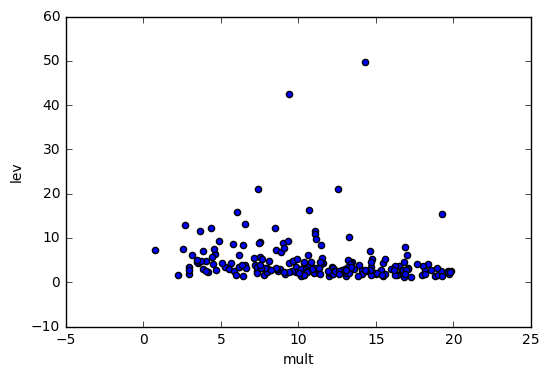

In [258]:
df.plot('mult', 'lev', kind='scatter');

## **Check out the correlation**

In [186]:
df.corr()

,cap,ocf,lev,score,mult
cap,1.000000,0.858061,0.002926,0.514352,0.121047
ocf,0.858061,1.000000,0.043680,0.377518,-0.126582
lev,0.002926,0.043680,1.000000,-0.103499,-0.150792
score,0.514352,0.377518,-0.103499,1.000000,0.229777
mult,0.121047,-0.126582,-0.150792,0.229777,1.000000


## **Make our Dummy Variables**

In [269]:
ceo_dum = patsy.dmatrix('ceogood',data=df,return_type='dataframe')
sic_dum = patsy.dmatrix('sicnum',data=df,return_type='dataframe')
del sic_dum['Intercept']
df_dum = df.join(ceo_dum)
df_dum = df_dum.join(sic_dum)

## **View the new Data Frame**

In [221]:
df_dum

,Ticker,cap,ocf,lev,sicnum,sictxt,ceogood,ceoage,score,mult,...,sicnum[T.S62],sicnum[T.S63],sicnum[T.S64],sicnum[T.S65],sicnum[T.S67],sicnum[T.S70],sicnum[T.S72],sicnum[T.S73],sicnum[T.S80],sicnum[T.Sna]
0,A,15640.0,793.0,1.84,S38,LABORATORY ANALYTICAL INSTRUMENTS,False,55,7.0,19.722573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AA,6610.0,NaN,2.48,S33,ROLLING DRAWING & EXTRUDING OF NONFERROUS METALS,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAL,22570.0,6125.0,11.64,S45,"AIR TRANSPORTATION, SCHEDULED",False,54,-2.0,3.684898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAP,12010.0,579.0,2.95,S55,RETAIL-AUTO & HOME SUPPLY STORES,False,58,5.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAPL,644750.0,65824.0,2.51,S35,ELECTRONIC COMPUTERS,False,55,31.0,9.795060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ABBV,98850.0,7463.0,10.30,S28,PHARMACEUTICAL PREPARATIONS,False,62,-3.0,13.245344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ABC,19130.0,3178.0,15.81,S51,WHOLESALE-DRUGS PROPRIETARIES & DRUGGISTS' SUN...,False,54,-4.0,6.019509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ABT,60930.0,2861.0,1.90,S28,PHARMACEUTICAL PREPARATIONS,False,61,9.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ACE,NaN,NaN,1.56,Sna,NaN,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,ACN,70900.0,5016.0,2.76,S73,"SERVICES-BUSINESS SERVICES, NEC",True,56,6.0,14.134769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Create a Regression Summary Table**

In [228]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 61 columns):
Ticker             298 non-null object
cap                281 non-null float64
ocf                288 non-null float64
lev                285 non-null float64
sicnum             298 non-null object
sictxt             295 non-null object
ceogood            285 non-null object
ceoage             280 non-null object
score              287 non-null float64
mult               220 non-null float64
Intercept          285 non-null float64
ceogood[T.True]    285 non-null float64
sicnum[T.S12]      298 non-null float64
sicnum[T.S13]      298 non-null float64
sicnum[T.S15]      298 non-null float64
sicnum[T.S16]      298 non-null float64
sicnum[T.S20]      298 non-null float64
sicnum[T.S23]      298 non-null float64
sicnum[T.S24]      298 non-null float64
sicnum[T.S25]      298 non-null float64
sicnum[T.S26]      298 non-null float64
sicnum[T.S28]      298 non-null float64
sicnum[T.S29]      2

In [270]:
y=df_dum.mult
x=df_dum.drop(['Ticker', 'cap', 'ocf', 'sicnum', 'sictxt', 'mult', 'Intercept'],1)

In [271]:
lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [275]:
x.fillna("abc", inplace=True)

In [276]:
x

,lev,ceogood,ceoage,score,ceogood[T.True],sicnum[T.S12],sicnum[T.S13],sicnum[T.S15],sicnum[T.S16],sicnum[T.S20],...,sicnum[T.S62],sicnum[T.S63],sicnum[T.S64],sicnum[T.S65],sicnum[T.S67],sicnum[T.S70],sicnum[T.S72],sicnum[T.S73],sicnum[T.S80],sicnum[T.Sna]
0,1.840000,False,55,7.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.480000,abc,abc,-0.027875,0.112281,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.640000,False,54,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.950000,False,58,5.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.510000,False,55,31.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10.300000,False,62,-3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,15.810000,False,54,-4.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.900000,False,61,9.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.560000,abc,abc,3.000000,0.112281,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2.760000,True,56,6.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
